Naila H. Ramadhani (5026211022)

Quiz 2: Machine Learning

# LIBRARIES

In [14]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

# IMPORTING DATA

In [2]:
df = pd.read_csv('onlineRetail.csv')
df1 = pd.read_csv('healthcare.csv')

# EXPLORING DATA

##Data Informations

In [3]:
df.shape

(541909, 8)

In [4]:
df1.shape

(10000, 15)

In [5]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  obj

In [6]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
478739,577106,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2011-11-17 17:18:00,3.25,14456.0,United Kingdom


In [7]:
df1.sample()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
9680,Cheryl Simpson,49,Male,O+,Obesity,2020-11-24,Emily Ferguson,Kelley-Vazquez,UnitedHealthcare,17258.32128,357,Urgent,2020-12-16,Aspirin,Inconclusive


## Data Analysis

### Online Retail Dataset

The **largest** quantity and type of goods ordered in each country

In [8]:
# Group by 'Country' and 'StockCode' and calculate the sum of 'Quantity' for each combination
most_bought_items = df.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index()

# Find the index of the maximum 'Quantity' for each 'Country'
idx_most_bought = most_bought_items.groupby('Country')['Quantity'].idxmax()

# Select the rows with the most bought items for each country
most_bought_items_result = most_bought_items.loc[idx_most_bought]

# Display the result
print("Most Bought Item for Each Country:")
print(most_bought_items_result)

Most Bought Item for Each Country:
                    Country StockCode  Quantity
224               Australia     22492      2916
675                 Austria     21918       288
914                 Bahrain     23076        96
1011                Belgium     21212       480
1708                 Brazil     21430        24
1851                 Canada     37370       504
1956        Channel Islands     21785       407
2469                 Cyprus     22335       384
2821         Czech Republic     22578        72
2877                Denmark     21915       288
3667                   EIRE     22197      1809
5077     European Community     22571        24
5546                Finland    84997D       552
6610                 France     23084      4023
7708                Germany     22326      1218
8800                 Greece     21615        48
9004              Hong Kong     22326       150
9169                Iceland     23076       240
9230                 Israel     20719       130
9894 

The **least** quantity and type of goods ordered in each country

In [9]:
idx_least_bought = most_bought_items.groupby('Country')['Quantity'].idxmin()
least_bought_items_result = most_bought_items.loc[idx_least_bought]

# Display the result
print("\nLeast Bought Item for Each Country:")
print(least_bought_items_result)



Least Bought Item for Each Country:
                    Country StockCode  Quantity
152               Australia     22094        -5
701                 Austria     22153       -48
907                 Bahrain     22423         2
1592                Belgium     37449        -1
1724                 Brazil     23049         2
1781                 Canada     22423         1
2309        Channel Islands         M         0
2585                 Cyprus     22839         0
2829         Czech Republic    84459A       -24
2838                Denmark    16169E         0
3256                   EIRE     21144       -12
5069     European Community     22424         1
5302                Finland     22487         1
7109                 France         M       -16
8156                Germany     22998       -20
8859                 Greece     22803         1
9109              Hong Kong         M         0
9213                Iceland    85232D         3
9336                 Israel     22474       -32
949

### Healtcare Dataset

In [29]:
pip install matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


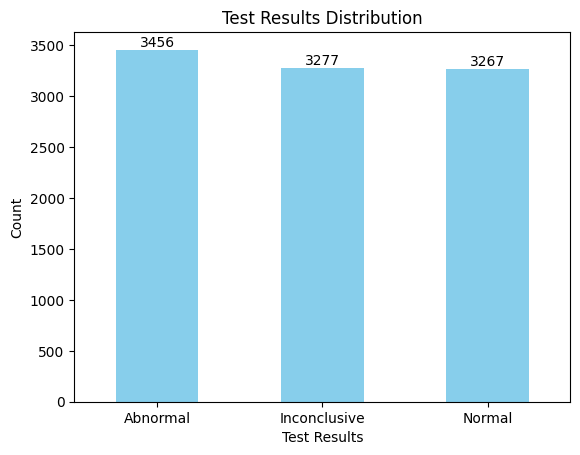

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the "Test Results" column
test_results_counts = df1['Test Results'].value_counts()

# Create a bar plot
test_results_counts.plot(kind='bar', rot=0, color='skyblue')
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')

# Display the count values on top of the bars
for i, value in enumerate(test_results_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

# DATA PREPROCESSING

## Online Retail Dataset

Delete rows with Invoice and Stock Codes that contain a combination of letters and numbers

In [23]:
# Convert 'InvoiceNo' and 'StockCode' to numeric, coerce non-numeric values to NaN
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')

# Drop rows where both 'InvoiceNo' and 'StockCode' are NaN (non-numeric)
df = df.dropna(subset=['InvoiceNo', 'StockCode'], how='all')

# Display the modified DataFrame
print(df)

        InvoiceNo  StockCode                          Description  Quantity  \
0        536365.0        NaN   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365.0    71053.0                  WHITE METAL LANTERN         6   
2        536365.0        NaN       CREAM CUPID HEARTS COAT HANGER         8   
3        536365.0        NaN  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365.0        NaN       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
541904   581587.0    22613.0          PACK OF 20 SPACEBOY NAPKINS        12   
541905   581587.0    22899.0         CHILDREN'S APRON DOLLY GIRL          6   
541906   581587.0    23254.0        CHILDRENS CUTLERY DOLLY GIRL          4   
541907   581587.0    23255.0      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908   581587.0    22138.0        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID 

Change the data type

In [24]:
# Drop rows with NaN values
df = df.dropna()

# Convert columns to integer (except 'Description' and 'Country')
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['StockCode'] = df['StockCode'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(int)

# Convert 'Description' and 'Country' to string
df['Description'] = df['Description'].astype(str)
df['Country'] = df['Country'].astype(str)

# Convert 'InvoiceDate' to datetime and extract date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%d-%m-%Y')

# Display the modified DataFrame
print(df)

<ipython-input-24-de4832245bd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(int)
<ipython-input-24-de4832245bd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = df['StockCode'].astype(int)
<ipython-input-24-de4832245bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

        InvoiceNo  StockCode                        Description  Quantity  \
1          536365      71053                WHITE METAL LANTERN         6   
5          536365      22752       SET 7 BABUSHKA NESTING BOXES         2   
6          536365      21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
7          536366      22633             HAND WARMER UNION JACK         6   
8          536366      22632          HAND WARMER RED POLKA DOT         6   
...           ...        ...                                ...       ...   
541904     581587      22613        PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587      22899       CHILDREN'S APRON DOLLY GIRL          6   
541906     581587      23254      CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587      23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587      22138      BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
1       01-12-2

## Healthcare Dataset

Check for missing value

In [25]:
print("\nMissing Values:")
print(df1.isnull().sum())


Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Encode categorical variables using Label Encoding

In [26]:
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Blood Type'] = label_encoder.fit_transform(df1['Blood Type'])
df1['Doctor'] = label_encoder.fit_transform(df1['Doctor'])
df1['Hospital'] = label_encoder.fit_transform(df1['Hospital'])
df1['Insurance Provider'] = label_encoder.fit_transform(df1['Insurance Provider'])
df1['Admission Type'] = label_encoder.fit_transform(df1['Admission Type'])

# MODELLING

## Association Rule

In [27]:
pip install mlxtend

In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split

# Transaction encoding: Convert the dataframe to a transaction format
transactions = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert the quantities to binary (0 or 1)
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
train_transactions, test_transactions = train_test_split(transactions, test_size=0.2, random_state=42)

# Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(train_transactions, min_support=0.02, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print("\nAssociation Rules:")
print(rules.head())

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Association Rules:
                    antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE RED )   
1   (ALARM CLOCK BAKELIKE RED )  (ALARM CLOCK BAKELIKE GREEN)   
2   (ALARM CLOCK BAKELIKE RED )   (ALARM CLOCK BAKELIKE PINK)   
3   (ALARM CLOCK BAKELIKE PINK)   (ALARM CLOCK BAKELIKE RED )   
4         (SPACEBOY LUNCH BOX )        (DOLLY GIRL LUNCH BOX)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.044522            0.048844  0.029842    0.670262  13.722484   
1            0.048844            0.044522  0.029842    0.610955  13.722484   
2            0.048844            0.033615  0.021884    0.448034  13.328546   
3            0.033615            0.048844  0.021884    0.651020  13.328546   
4            0.039857            0.034987  0.024353    0.611015  17.464260   

   leverage  conviction  zhangs_metric  
0  0.027667    2.884580       0.970328  
1  0.027667    2.455957       0.974737

* Antecedents and Consequents: These columns represent the itemsets involved in the rule. An antecedent is the itemset on the left side of the rule, and the consequent is on the right side. For example, in the first rule, if a customer buys the "ALARM CLOCK BAKELIKE GREEN," they are likely to buy the "ALARM CLOCK BAKELIKE RED" as well.

* Antecedent Support and Consequent Support:These columns show the support (frequency) of the antecedent and consequent itemsets independently. For instance, the support of the "ALARM CLOCK BAKELIKE GREEN" is 0.044522, indicating that this item appears in 4.45% of all transactions.

* Support: This column indicates the support for the combined antecedent and consequent itemsets. In the first rule, the support is 0.029842, suggesting that the combination of "ALARM CLOCK BAKELIKE GREEN" and "ALARM CLOCK BAKELIKE RED" appears in 2.98% of transactions.

* Confidence: Measures how often the rule has been found to be true. In the first rule, the confidence is 0.670262, indicating that when "ALARM CLOCK BAKELIKE GREEN" is purchased, there is a 67.03% chance that "ALARM CLOCK BAKELIKE RED" will also be purchased.

* Lift: Measures how much more likely the consequent is to be purchased when the antecedent is purchased compared to its default likelihood. A lift value greater than 1 indicates that the rule has a positive impact on the likelihood of the consequent being purchased. In the first rule, the lift is 13.722484, suggesting a strong positive association.

* Leverage: Calculates the difference between the observed frequency of the itemset and what would be expected if the items were independent. A positive leverage indicates that the items appear together more often than expected.

* Conviction: Measures the dependence of the consequent on the antecedent. Higher conviction values indicate stronger dependence. In the first rule, the conviction is 2.884580.

* Zhang's metric: Another measure of association strength. A value close to 1 indicates a strong association. In the first rule, the value is 0.970328.

## Clustering

Clustering is an unsupervised learning method where the algorithm groups similar data points together without the need for labeled data. Since clustering is unsupervised, we don't typically split the data into training and testing sets.

### Online Retail Dataset

In this case, each data point in the scatter plot represents a customer, and the clustering is based on the similarity of customers in terms of their purchasing behavior.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


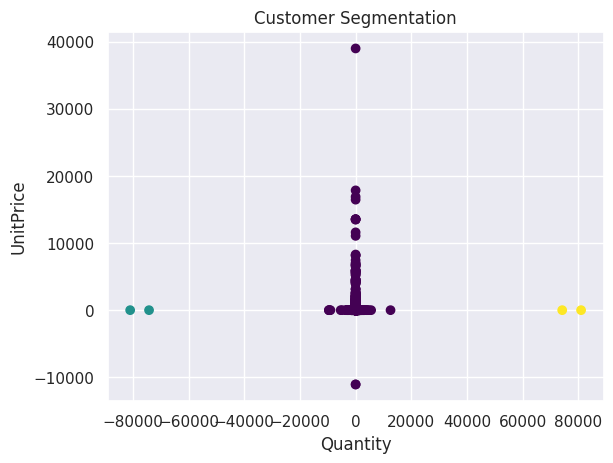

        CustomerID  Quantity  UnitPrice  CustomerSegment
0          17850.0         6       2.55                0
1          17850.0         6       3.39                0
2          17850.0         8       2.75                0
3          17850.0         6       3.39                0
4          17850.0         6       3.39                0
...            ...       ...        ...              ...
541904     12680.0        12       0.85                0
541905     12680.0         6       2.10                0
541906     12680.0         4       4.15                0
541907     12680.0         4       4.15                0
541908     12680.0         3       4.95                0

[541909 rows x 4 columns]


In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature selection
selected_features = df[['Quantity', 'UnitPrice']]

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your data
df['CustomerSegment'] = kmeans.fit_predict(selected_features)

# Visualize the clusters (for a 2D space)
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['CustomerSegment'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

# Display the DataFrame with the assigned customer segments
print(df[['CustomerID', 'Quantity', 'UnitPrice', 'CustomerSegment']])


*   Each point in the scatter plot represents a customer.
*   The 'CustomerSegment' column in the DataFrame represents the assigned cluster labels for each customer based on their purchasing behavior.
*   The scatter plot colors each point according to its assigned customer segment.

### Healthcare Dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


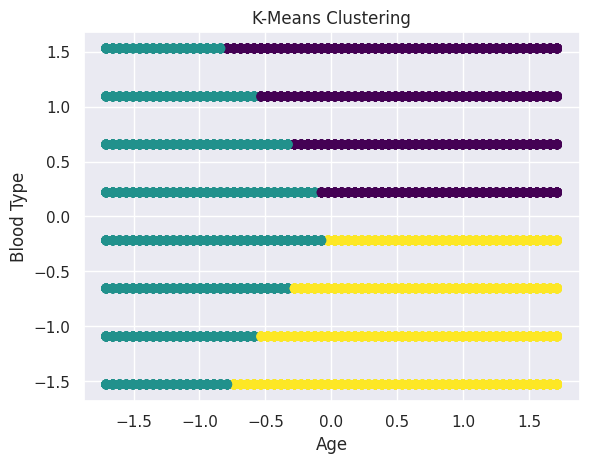

In [113]:
# Feature selection
features = ['Age', 'Blood Type']
X = df1[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Predict cluster labels
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for a 2D space)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df1['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Blood Type')
plt.show()

*  Each point in the plot represents an instance
* The color indicates the cluster assignment

## Classification

To predict whether a product should be restocked based on certain features

### Online Retail Dataset

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the target variable 'RestockNeeded'
# Define a threshold for 'Quantity' below which restocking is needed
restock_threshold = 10
df['RestockNeeded'] = (df['Quantity'] < restock_threshold).astype(int)

# Feature selection
features = df[['Quantity', 'UnitPrice']]

# Target variable
target = df['RestockNeeded']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model to your training data
clf.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 1.00
Confusion Matrix:
[[27094     0]
 [    0 45530]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27094
           1       1.00      1.00      1.00     45530

    accuracy                           1.00     72624
   macro avg       1.00      1.00      1.00     72624
weighted avg       1.00      1.00      1.00     72624



### Healthcare Dataset

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Feature selection: Considering only relevant features for simplicity
features = ['Age', 'Gender', 'Blood Type']
X = df1[features]
y = df1['Test Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Accuracy: 0.3315

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.33      0.33       706
Inconclusive       0.32      0.34      0.33       636
      Normal       0.33      0.33      0.33       658

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000

